In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


In [2]:
%matplotlib inline

In [3]:
from utils import visualizacion

In [4]:
from torchvision.io import read_image
import glob
from torch.utils.data import Dataset
import trimesh
import numpy as np
import pyvox.parser


class FragmentDataset(Dataset):
    def __init__(self, vox_path, vox_type, dim_size=64, transform=None):
        self.vox_type = vox_type
        self.vox_path = vox_path
        self.transform = transform
        self.dim_size = dim_size
        self.vox_files = sorted(glob.glob('{}/{}/*/*.vox'.format(self.vox_path, self.vox_type)))

    def __len__(self):
        return len(self.vox_files)

    def __read_vox__(self, path):
        vox = pyvox.parser.VoxParser(path).parse()
        a = vox.to_dense()
        caja = np.zeros((64, 64, 64))
        caja[0:a.shape[0], 0:a.shape[1], 0:a.shape[2]] = a
        return caja
    
    def __select_fragment__(self, v):
        frag_id = np.unique(v)[1:]
        select_frag = np.random.choice(frag_id, np.random.choice(np.arange(1, len(frag_id)), 1)[0], replace=False)
        for f in frag_id:
            if not(f in select_frag):
                v[v==f] = 0
            else:
                v[v==f] = 1
        return v, select_frag
    
    def __non_select_fragment__(self, v, select_frag):
        frag_id = np.unique(v)[1:]
        for f in frag_id:
            if not(f in select_frag):
                v[v==f] = 1
            else:
                v[v==f] = 0
        return v


    def __getitem__(self, idx):

        img_path = self.vox_files[idx]
        vox = self.__read_vox__(img_path)
        label = img_path.replace(self.vox_path, '').split('/')[2]
        frag, select_frag= self.__select_fragment__(vox.copy())
        
        if self.transform:
            vox = self.transform(vox)
            frag = self.transform(frag)

        #return frag, vox, select_frag, int(label)-1, img_path
        return frag, vox, select_frag, int(label)-1, img_path

In [5]:
fd = FragmentDataset('./data', 'train', )

In [6]:
for i in range(fd.__len__()):
    fragmento, completo, svox, label, path  = fd.__getitem__(i)
    fragmento.shape
    break

In [7]:
svox

array([2.])

In [8]:
path

'./data/train/1/AL_13B-n003-t1649436918.vox'

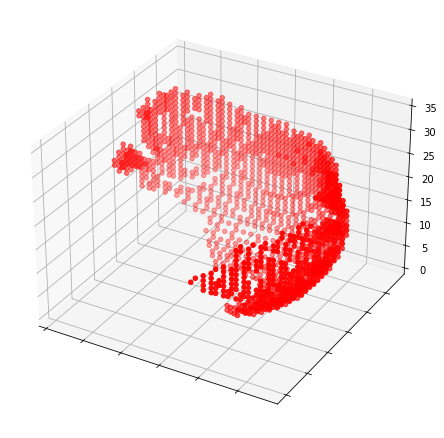

In [9]:
visualizacion.show_voxels(fragmento)

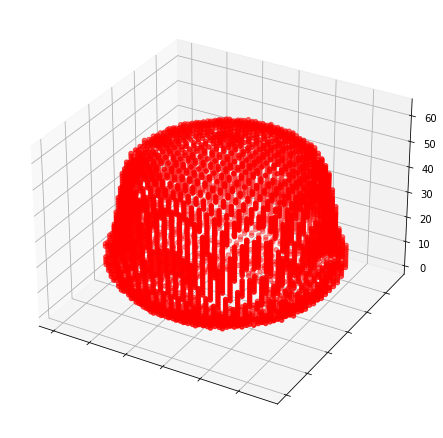

In [10]:
visualizacion.show_voxels(completo)

In [11]:
non_v = fd.__non_select_fragment__(completo, svox)

In [12]:
fragmento.shape

(64, 64, 64)

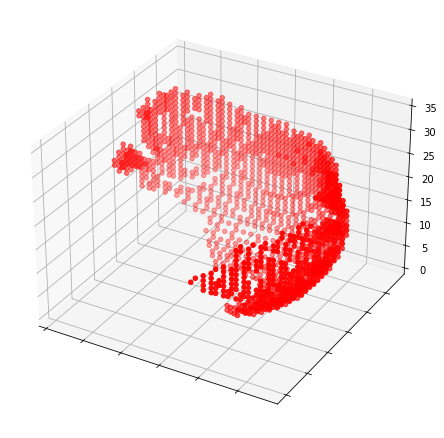

In [13]:
voxels = np.expand_dims(fragmento, 0)
#colors_dict = {0:'black', 2:'red', 3:'blue', 4:'green', 5:'yellow', 6:'purple'}
colors_dict = {1:'red'}
fig = plt.figure(figsize=(32, 16))
gs = gridspec.GridSpec(2, 4)
gs.update(wspace=0.05, hspace=0.05)
for i, sample in enumerate(voxels):
    color = []
    sample = np.array(sample)
    x, y, z = sample.nonzero()
    ax = plt.subplot(gs[i], projection='3d')
    for i in range(x.shape[0]):
        color.append(sample[x[i]][y[i]][z[i]])
    ax.scatter(x, y, z, zdir='z', c=[colors_dict[c] for c in color])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_aspect('auto')

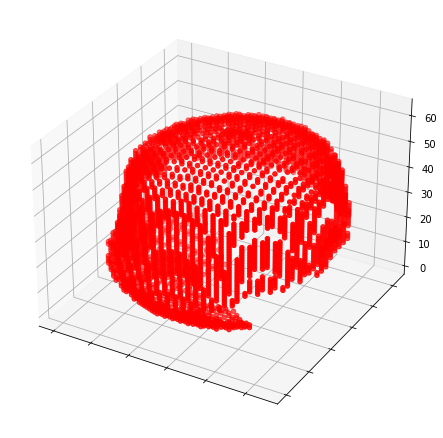

In [14]:
voxels = np.expand_dims(non_v, 0)
#colors_dict = {0:'black', 2:'red', 3:'blue', 4:'green', 5:'yellow', 6:'purple'}
colors_dict = {1:'red'}
fig = plt.figure(figsize=(32, 16))
gs = gridspec.GridSpec(2, 4)
gs.update(wspace=0.05, hspace=0.05)
for i, sample in enumerate(voxels):
    color = []
    sample = np.array(sample)
    x, y, z = sample.nonzero()
    ax = plt.subplot(gs[i], projection='3d')
    for i in range(x.shape[0]):
        color.append(sample[x[i]][y[i]][z[i]])
    ax.scatter(x, y, z, zdir='z', c=[colors_dict[c] for c in color])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_aspect('auto')

In [15]:
f = fragmento.copy()

In [16]:
f[f==1] = 2

In [17]:
_non_v = non_v.copy()
_non_v[_non_v==1] = 3

In [18]:
suma = f + _non_v

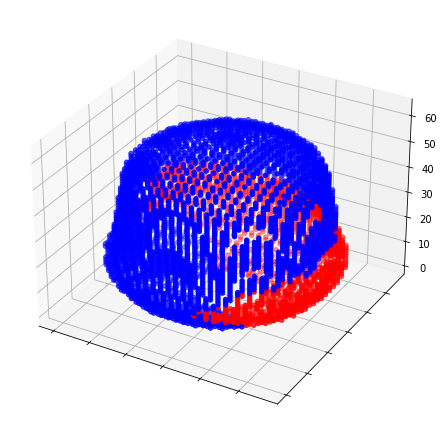

In [19]:
voxels = np.expand_dims(suma, 0)
colors_dict = {0:'black', 2:'red', 3:'blue', 4:'green', 5:'yellow', 6:'purple'}
#colors_dict = {1:'red'}
fig = plt.figure(figsize=(32, 16))
gs = gridspec.GridSpec(2, 4)
gs.update(wspace=0.05, hspace=0.05)
for i, sample in enumerate(voxels):
    color = []
    sample = np.array(sample)
    x, y, z = sample.nonzero()
    ax = plt.subplot(gs[i], projection='3d')
    for i in range(x.shape[0]):
        color.append(sample[x[i]][y[i]][z[i]])
    ax.scatter(x, y, z, zdir='z', c=[colors_dict[c] for c in color])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_aspect('auto')

In [20]:
from torch.utils import data
from utils.FragmentDataset import FragmentDataset

In [21]:
dt = FragmentDataset('./data', 'train', )


In [22]:
data_loader = data.DataLoader(dt, batch_size=16, shuffle=True, drop_last=True)

In [23]:
for i,j in data_loader:
    break

[8.]
[5.]
[5.]
[4.]
[8.]
[6.]
[2.]
[13.]
[2.]
[11.]
[10.]
[14.]
[3.]
[11.]
[4.]
[3.]


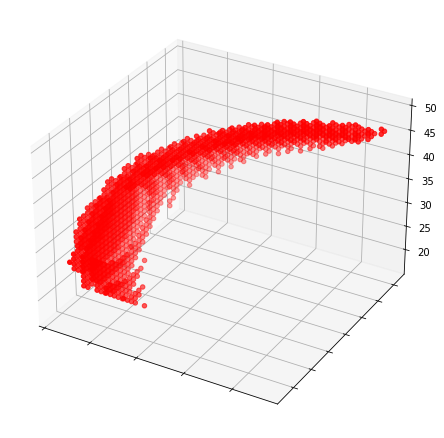

In [25]:
visualizacion.show_voxels(i[0])

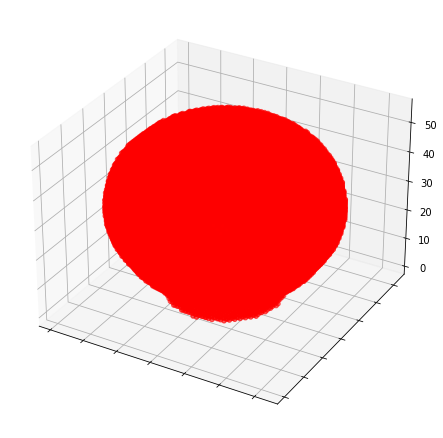

In [26]:
visualizacion.show_voxels(j[0])